# importing all the packages #

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Reading the dataset #

In [72]:
data =pd.read_csv(r'C:\Users\Sai\Desktop\DATA SCIENCE\Speed_dataset.csv')



In [73]:
data.head() # which reads the top five rows in the dataset #

,latitude,longitude,timestamp,speed_mph,speedlimit_mph,functionalClass,controlledAccess,isHighway,state,vehicle_id,driver_id
0,34.640141,-77.938721,6/1/2015 0:04,64,70,2,Y,1,NC,1208979,5693
1,34.643730,-77.939400,6/1/2015 0:04,64,70,2,Y,1,NC,1208979,5693
2,34.551254,-78.784630,6/1/2015 0:04,1,55,4,N,1,NC,1262441,916461
3,35.613663,-78.470596,6/1/2015 0:06,62,70,2,Y,1,NC,1280223,1145487
4,35.614525,-78.474670,6/1/2015 0:06,61,70,2,Y,1,NC,1280223,1145487


In [74]:
data.tail() #which reads the bottom five rows in the dataset #


,latitude,longitude,timestamp,speed_mph,speedlimit_mph,functionalClass,controlledAccess,isHighway,state,vehicle_id,driver_id
343623,36.299755,-76.251152,11/30/2015 23:51,46,50,3,N,0,NC,607681,991329
343624,34.622124,-79.050201,11/30/2015 23:51,11,35,4,N,0,NC,1351613,322085
343625,35.548748,-78.304947,11/30/2015 23:51,4,45,4,N,0,NC,550768,1288064
343626,35.822601,-79.572960,11/30/2015 23:52,65,65,2,Y,1,NC,617989,1272718
343627,36.063713,-79.930313,11/30/2015 23:53,16,55,5,N,1,NC,565771,1159793


# Analyzing the Data #

In [75]:
data.describe() # which gives summary of  the dataset #

,latitude,longitude,speed_mph,speedlimit_mph,functionalClass,isHighway,vehicle_id,driver_id
count,343628.000000,343628.000000,343628.000000,343628.000000,343628.000000,343628.000000,3.436280e+05,3.436280e+05
mean,35.504742,-78.495537,38.176129,54.442391,3.040398,0.683640,8.401167e+05,5.650171e+05
std,0.794903,0.910243,24.945979,10.014904,1.368529,0.465056,5.027187e+05,5.193492e+05
min,33.318760,-84.402771,1.000000,20.000000,0.000000,0.000000,1.429000e+03,0.000000e+00
25%,35.005116,-78.926933,10.000000,45.000000,2.000000,0.000000,5.350240e+05,3.871900e+04
50%,35.531018,-78.458893,44.000000,55.000000,3.000000,1.000000,6.179890e+05,4.662930e+05
75%,35.794942,-78.122360,64.000000,65.000000,4.000000,1.000000,1.207151e+06,1.144565e+06
max,38.641785,-75.599670,79.000000,70.000000,5.000000,1.000000,1.889852e+06,1.393454e+06


In [76]:
data.info() # which gives the type of the variable #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343628 entries, 0 to 343627
Data columns (total 11 columns):
latitude            343628 non-null float64
longitude           343628 non-null float64
timestamp           343628 non-null object
speed_mph           343628 non-null int64
speedlimit_mph      343628 non-null int64
functionalClass     343628 non-null int64
controlledAccess    343628 non-null object
isHighway           343628 non-null int64
state               343628 non-null object
vehicle_id          343628 non-null int64
driver_id           343628 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 28.8+ MB


In [77]:
data.corr() # which gives correlation of the variables #

,latitude,longitude,speed_mph,speedlimit_mph,functionalClass,isHighway,vehicle_id,driver_id
latitude,1.000000,0.379375,-0.052393,-0.037666,-0.036304,-0.029942,0.269873,0.302945
longitude,0.379375,1.000000,-0.012837,-0.005605,0.040911,0.023697,0.235899,0.061322
speed_mph,-0.052393,-0.012837,1.000000,0.675648,-0.724927,0.551639,0.014499,0.025560
speedlimit_mph,-0.037666,-0.005605,0.675648,1.000000,-0.624328,0.762467,0.021273,0.014920
functionalClass,-0.036304,0.040911,-0.724927,-0.624328,1.000000,-0.478363,-0.038748,-0.084222
isHighway,-0.029942,0.023697,0.551639,0.762467,-0.478363,1.000000,0.024292,0.009829
vehicle_id,0.269873,0.235899,0.014499,0.021273,-0.038748,0.024292,1.000000,0.018155
driver_id,0.302945,0.061322,0.025560,0.014920,-0.084222,0.009829,0.018155,1.000000


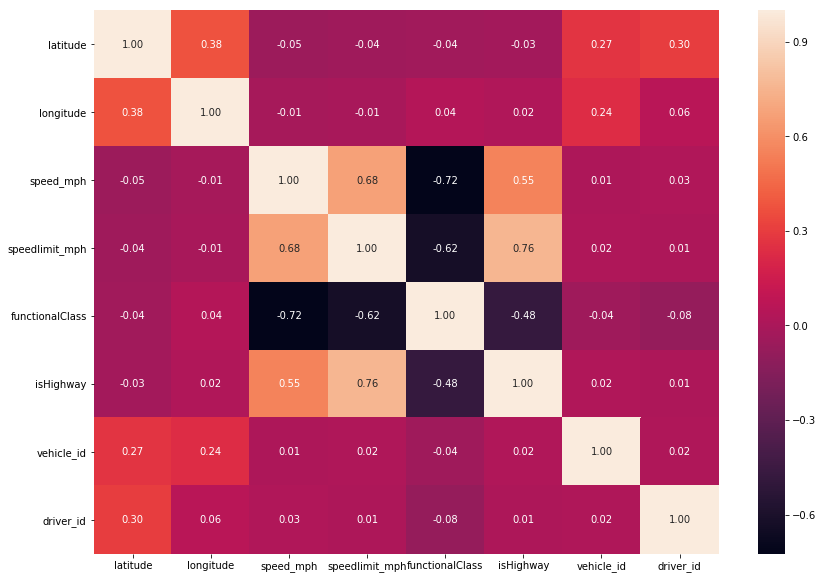

In [78]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,fmt='.2f') # heapmap for the correlation of the variables #
plt.show()

In [79]:
print("No of drivers:" +str(len(data.driver_id)))

No of drivers:343628


# Wrangling the data #

In [80]:
data.isnull()

,latitude,longitude,timestamp,speed_mph,speedlimit_mph,functionalClass,controlledAccess,isHighway,state,vehicle_id,driver_id
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


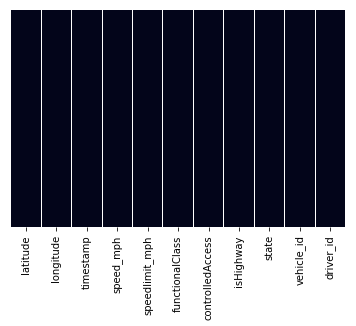

In [81]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False) # the data is clean without any missing values #

In [82]:
data.isnull().sum()

latitude            0
longitude           0
timestamp           0
speed_mph           0
speedlimit_mph      0
functionalClass     0
controlledAccess    0
isHighway           0
state               0
vehicle_id          0
driver_id           0
dtype: int64

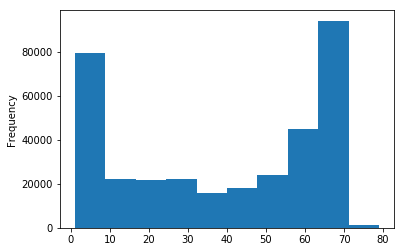

In [83]:
data["speed_mph"].plot.hist()

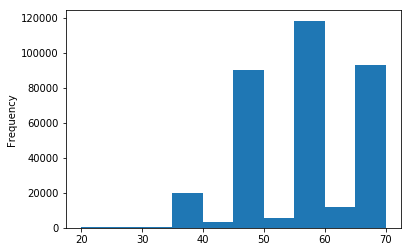

In [88]:
data["speedlimit_mph"].plot.hist()

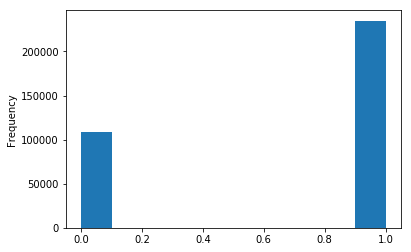

In [84]:
data["isHighway"].plot.hist()

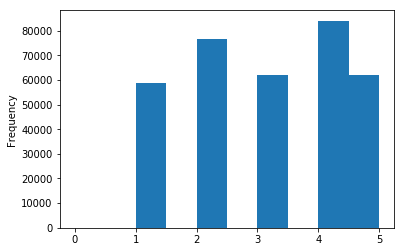

In [89]:
data["functionalClass"].plot.hist()

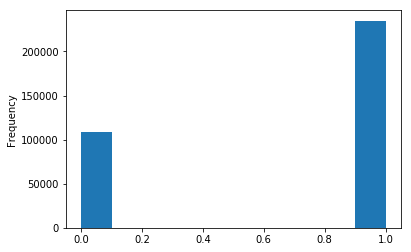

In [90]:
data["isHighway"].plot.hist()

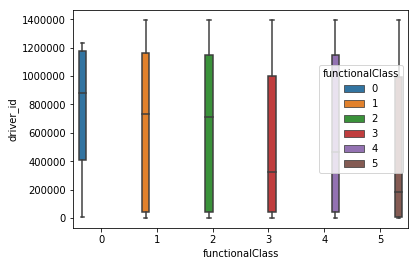

In [93]:
sns.boxplot(x="functionalClass", y="driver_id", hue="functionalClass",data=data)

In [ ]:
sns.boxplot(x="latitude", y="longitude", hue="functionalClass",data=data)

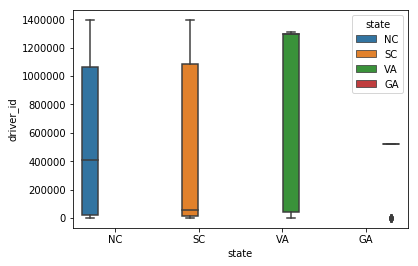

In [92]:
sns.boxplot(x="state", y="driver_id", hue="state",data=data)

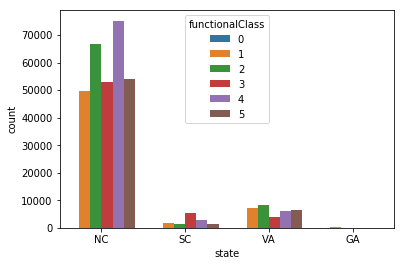

In [94]:
sns.countplot(x="state", hue="functionalClass", data=data)

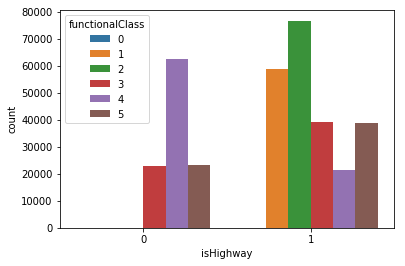

In [95]:
sns.countplot(x="isHighway", hue="functionalClass", data=data)

In [102]:
good_driver = data[data.speed_mph<=35]
print(good_driver)


         latitude  longitude         timestamp  speed_mph  speedlimit_mph  \
2       34.551254 -78.784630     6/1/2015 0:04          1              55   
6       34.328571 -78.926056     6/1/2015 0:24         23              55   
7       35.756538 -78.699715     6/1/2015 0:30          3              55   
14      34.552170 -78.784126     6/1/2015 0:55         27              55   
19      34.657280 -78.727158     6/1/2015 1:05         32              35   
20      34.658459 -78.726082     6/1/2015 1:05          7              35   
21      34.659496 -78.726418     6/1/2015 1:05         33              35   
22      35.757271 -78.699623     6/1/2015 1:13          6              45   
30      35.902550 -78.661781     6/1/2015 1:35         20              45   
31      35.902424 -78.660439     6/1/2015 1:36         28              45   
32      35.902401 -78.660301     6/1/2015 1:36         30              45   
33      35.900974 -78.654831     6/1/2015 1:39          2              55   

In [112]:
len(good_driver)

152853

In [111]:
bad_driver = data[data.speed_mph>=35]
print(bad_driver)


         latitude  longitude         timestamp  speed_mph  speedlimit_mph  \
0       34.640141 -77.938721     6/1/2015 0:04         64              70   
1       34.643730 -77.939400     6/1/2015 0:04         64              70   
3       35.613663 -78.470596     6/1/2015 0:06         62              70   
4       35.614525 -78.474670     6/1/2015 0:06         61              70   
5       34.860115 -77.999969     6/1/2015 0:19         64              70   
8       34.402813 -78.916901     6/1/2015 0:33         65              70   
9       35.039543 -78.149475     6/1/2015 0:34         64              70   
10      35.042751 -78.150772     6/1/2015 0:34         64              70   
11      34.443115 -78.959885     6/1/2015 0:36         64              70   
12      34.590424 -79.068939     6/1/2015 0:48         65              65   
13      35.191341 -78.283020     6/1/2015 0:49         64              70   
15      34.741947 -78.997086     6/1/2015 1:03         65              65   

193335

In [113]:
len(bad_driver)

193335

In [115]:
good_driver_prec = float(len(good_driver)/len(driver_id)*50)
bad_driver_prec = float(len(bad_driver)/len(driver_id)*50)
print("good_driver = %.2f%%" % good_driver_prec)

print("bad_driver = %.2f%%" % bad_driver_prec)

good_driver = 50.00%
bad_driver = 63.24%


In [121]:
data.functionalClass.value_counts()

4    83983
2    76635
3    62147
5    62068
1    58783
0       12
Name: functionalClass, dtype: int64

In [123]:
data.groupby('functionalClass').driver_id.value_counts()

functionalClass  driver_id
0                882873          4
                 406943          2
                 1235549         2
                 5687            1
                 21436           1
                 1159793         1
                 1222453         1
1                524221       2453
                 0            1809
                 5687         1552
                 997291       1441
                 4276         1397
                 39251        1355
                 714485       1333
                 1200561      1247
                 5693         1243
                 995637       1237
                 65743        1222
                 4287         1195
                 1163537      1157
                 884137       1144
                 812033       1142
                 1297399      1136
                 406943       1121
                 992205       1120
                 1163791      1119
                 2132         1116
                 1091309    

In [124]:
lat_max = data.latitude.max()
lat_min = data.latitude.min()
print("Range of latitude:", lat_max, lat_min)

lon_max = data.longitude.max()
lon_min = data.longitude.min()
print("Range of longitude:", lon_max, lon_min)

Range of latitude: 38.641785 33.31876
Range of longitude: -75.59966999999999 -84.402771


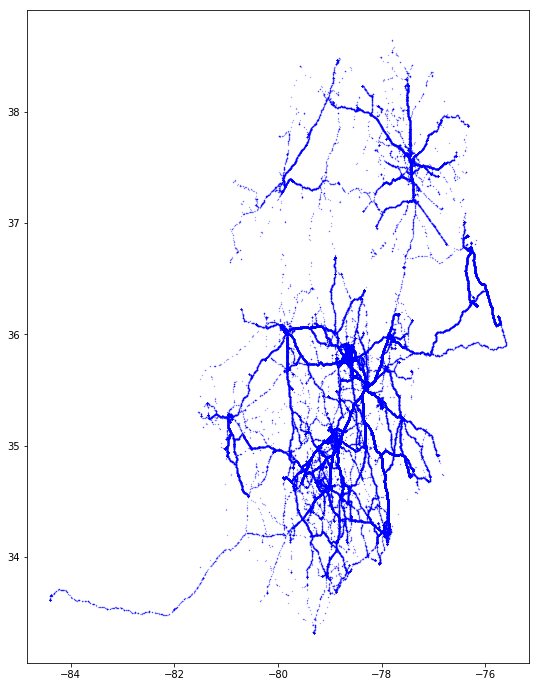

In [54]:
fig, axes = plt.subplots(figsize=(9,12))
axes.scatter(data.longitude, data.latitude, s=0.1, alpha=0.5, c='b')
plt.show()


In [ ]:
data=data.drop(['state','controlledAccess','timestamp'],axis=1)


In [ ]:
data.head()

In [ ]:
X=data.iloc[:,0:-1]
y=data.iloc[:,-1]
print(X.head())
print(y.head())
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.80,shuffle=False)


In [ ]:
clf=GaussianNB()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

In [ ]:
clf=RandomForestClassifier(n_estimators=100)
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

In [ ]:
print("Accuracy: %f " % (100*accuracy_score(y_test, pred)))